# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [1]:
import math

def find_polar_angle(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    
    angle = math.atan2(y1-y2, x1-x2) - math.atan2(y3-y2, x3-x2)  

    # return the negative angle if in third or fourth quadrant 
    return angle if angle < math.pi else angle - 2 * math.pi

def get_distance(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

def jarvismarch(inputSet):
    '''
    Returns the list of points that lie on the convex hull (jarvis march algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    
    outputSet = []

    # start with the leftmost element 
    start = min(inputSet)

    outputSet.append(start)

    on_hull = start

    # add 1 to y coordinate have initial angle of pi/2
    prev_point = [start[0], start[1] + 1] 

    # set to true once we return to the start point
    looped = False

    while not looped:

        # store the smallest clockwise angle
        min_angle = float("inf")

        next_point = None        

        for point in inputSet:

            if point == on_hull:
                continue
                
            angle = find_polar_angle(prev_point, on_hull, point)

            if next_point is None or angle < min_angle:
                min_angle = angle
                next_point = point
            
            # if points are colinear, take the one further away
            elif angle == min_angle:
                if get_distance(on_hull, point) > get_distance(on_hull, next_point):
                    next_point = point
            
        if next_point == start:
            looped = True
        else:
            prev_point = on_hull
            on_hull = next_point
            outputSet.append(on_hull)
            inputSet.remove(on_hull)

    #ADD YOUR CODE HERE

    return outputSet

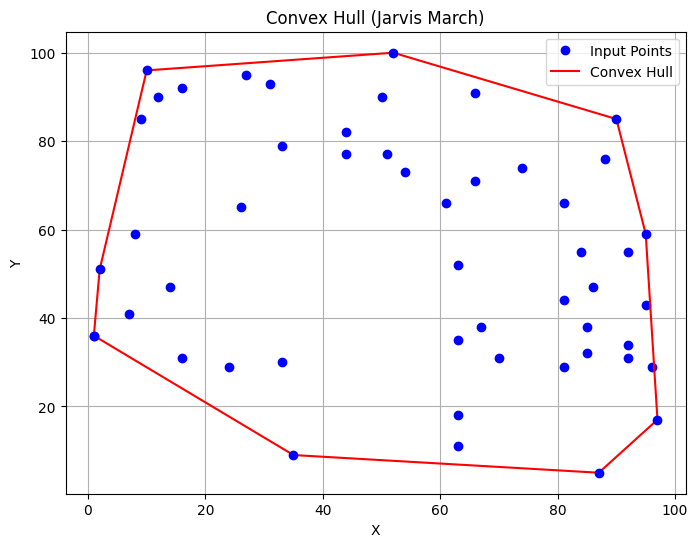

In [2]:
import random
import matplotlib.pyplot as plt

def generate_random_points(num_points, max_value=100):
    """Generates a list of random 2D points within a specified range."""
    return [(random.randint(0, max_value), random.randint(0, max_value)) for _ in range(num_points)]

def visualize_results(points, hull_points):
    """Visualizes the input points and the computed convex hull."""
    plt.figure(figsize=(8, 6))

    # Plot all input points in blue
    plt.plot([p[0] for p in points], [p[1] for p in points], 'bo', label='Input Points')

    # Plot hull points in red, connected by lines
    hull_x = [p[0] for p in hull_points + [hull_points[0]]]  # Close the loop for visualization
    hull_y = [p[1] for p in hull_points + [hull_points[0]]]
    plt.plot(hull_x, hull_y, 'r-', label='Convex Hull')

    # Plot hull points again in blue to ensure they are visible on top of the red line
    plt.plot([p[0] for p in hull_points], [p[1] for p in hull_points], 'bo')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Convex Hull (Jarvis March)')
    plt.legend()
    plt.grid(True)
    plt.show()

num_points = 50  
points = generate_random_points(num_points)

hull_points = jarvismarch(points)  # Call your Jarvis March function
visualize_results(points, hull_points)

Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

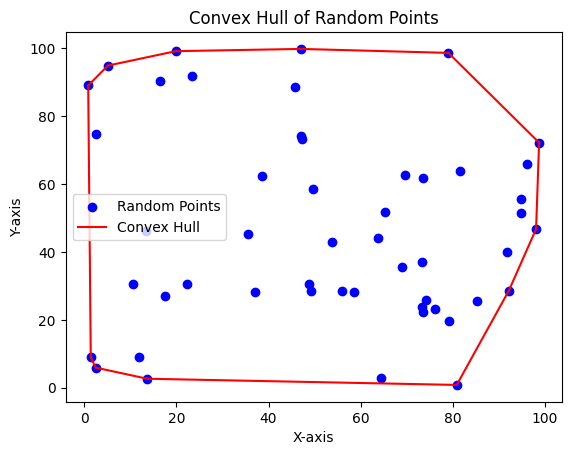

In [3]:
import matplotlib.pyplot as plt
import random
import math

# Function to generate random points
def generate_random_points(num_points, range_x, range_y):
    return [(random.uniform(0, range_x), random.uniform(0, range_y)) for _ in range(num_points)]

# Function to find the point with the lowest y-coordinate (and the leftmost in case of a tie)
def find_lowest_point(points):
    lowest_point = points[0]
    for point in points[1:]:
        if (point[1] < lowest_point[1]) or (point[1] == lowest_point[1] and point[0] < lowest_point[0]):
            lowest_point = point
    return lowest_point

# Function to compute the cross product to determine the orientation of the turn
def ccw(p1, p2, p3):
    #Return the cross product of vectors OA and OB (relative to O)
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])


def grahamscan(inputSet):
    '''
    Returns the list of points that lie on the convex hull (graham scan algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    
    # Step 1: Handle the edge case with fewer than 3 points
    if len(inputSet) < 3:
        # Convex hull is not defined for fewer than 3 points
        return inputSet

    # Remove duplicate points to avoid processing the same point twice
    inputSet = list(set(inputSet))

    # Step 2: Find the point with the lowest y-coordinate, or the lowest x-coordinate among ties
    #P= [float('inf'), float('inf')]
    P0 = find_lowest_point(points)
    
    # Step 3: Sort the points by the polar angle with P
    points.sort(key=lambda p: (math.atan2(p[1]-P0[1], p[0]-P0[0]), -((p[0]-P0[0])**2 + (p[1]-P0[1])**2)))

    # Step 4: Initialize the stack with the first two points
    outputSet = [points[0], points[1]]

    # Step 5: Process each point in the sorted array
    for point in points[2:]:
        # pop the last point from the stack if we turn clockwise to reach this point
        # Determine if we have a right turn or are collinear, and if so, pop from stack
        while len(outputSet) > 1 and ccw(outputSet[-2], outputSet[-1], point) <= 0:
            # A non-positive cross product means a right turn or collinear
            # The point is inside the hull and should be removed
            outputSet.pop()
        outputSet.append(point)
    
    # Step 6: Close the hull by checking if we need to remove the last point
    # This ensures that the convex hull is properly closed
    if len(outputSet) > 2 and ccw(outputSet[-2], outputSet[-1], points[0]) <= 0:
        # If the first point makes a non-left turn with the last two points, remove the last point
        outputSet.pop()

    # The stack now contains the points of the convex hull in counterclockwise order
    return outputSet

# Example usage:
# Generate 50 random points within a 100x100 grid
points = generate_random_points(50, 100, 100)

# Compute the convex hull using the Graham Scan algorithm
convex_hull = grahamscan(points)

# Plot the random points
plt.scatter(*zip(*points), c='blue', label='Random Points')

# Plot the convex hull
for i in range(len(convex_hull)):
    plt.plot(*zip(*convex_hull[i-1:i+1]), c='red')

# Close the hull by connecting the last point to the first
plt.plot(*zip(*[convex_hull[-1], convex_hull[0]]), c='red', label='Convex Hull')

# Add title, labels, and legend
plt.title('Convex Hull of Random Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [161]:
def chen(inputSet):
    '''
    Returns the list of points that lie on the convex hull (chen's algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''

    #ADD YOUR CODE HERE


    return outputSet

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [162]:
import random

class TestDataGenerator():
    """
    A class to represent a synthetic data generator.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__():
        pass


Use the cell below to implement the requested **experimental framework** API.

In [163]:
import timeit
import matplotlib

class ExperimentalFramework():
    """
    A class to represent an experimental framework.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__():
        pass

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

In [164]:
# ADD YOUR TEST CODE HERE 



